In [ ]:
CREATE NONE
CHECK CORRELATIONS BETWEEN CAPS and otehr features

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dir_path = os.path.realpath('..')

In [3]:
path = 'data/raw/train.csv'

full_path = os.path.join(dir_path, path)
df = pd.read_csv(full_path, header=0, index_col=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 95851 rows, 7 columns.


In [30]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['none'] = 1-df[labels].max(axis=1)
df['total'] = df[labels].sum(axis=1)

In [31]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,uppercase_count,total
id,,,,,,,,,,
22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0,1033,1
27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1,1033,0
54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1,1033,0
77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1,1033,0
79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1,1033,0


In [32]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,uppercase_count,total
count,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.0,95851.000000
mean,0.096368,0.010068,0.053301,0.003182,0.049713,0.008492,0.897862,1033.0,0.221124
std,0.295097,0.099832,0.224635,0.056320,0.217352,0.091762,0.302831,0.0,0.750533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1033.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1033.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1033.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1033.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1033.0,6.000000


In [13]:
target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'none']

none             0.897862
toxic            0.096368
obscene          0.053301
insult           0.049713
severe_toxic     0.010068
identity_hate    0.008492
threat           0.003182
dtype: float64


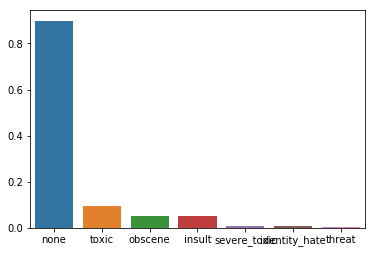

In [14]:
# Calculate means
mean = df[target].mean().sort_values(ascending=False)
 
# Barplot
sns.barplot(x=mean.index, y=mean.values)
print(mean)

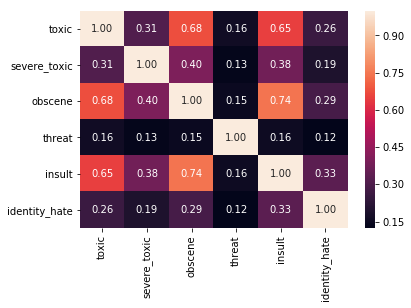

In [37]:
# Calculate correlations
corr = df[target].corr()
 
# Heatmap
sns.heatmap(corr, annot=True, fmt='.2f')

In [23]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,uppercase_count
id,,,,,,,,,
22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0,1033
27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1,1033
54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1,1033
77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1,1033
79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1,1033


In [34]:
print(df[df['total'] == 1])

                                                   comment_text  toxic  \
id                                                                       
22256635      Nonsense?  kiss off, geek. what I said is true...      1   
225701312     Why hasn't Alitalia been removed rom the allia...      1   
293668009     "\nThe Graceful Slick....\nIs non other than a...      1   
341549388     "\n\n Stupid? \n\nAs soon as I saw the phrase ...      1   
407636870                           Are you gay?? Sound like it      1   
659300233     and in the program on last night Crime Museum:...      1   
839277218     "\n\nI didn't call you a ""biased backward yan...      1   
955104481     HE THINKS THEY ARE COPYRIGHT VIOLATION. PITY H...      1   
1229646808    "\n\nWow, you're a little touchy aren't you? Y...      1   
1512938791    COINCIDENCE? \n\nHave you noticed that in ever...      1   
1590833599    For the last time, Turkish people ARE NOT WHIT...      1   
2302694137            u aint got no pa

In [35]:
df['processed'] = df['comment_text'].str.split()

In [77]:
from collections import Counter
df['uppercase_count'] = df['processed'].apply(lambda x: sum(1 for t in x if t.isupper() and len(t)>2))

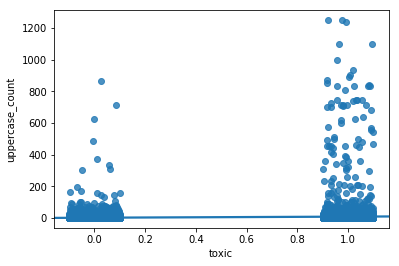

In [85]:
sns.regplot(x="toxic", y="uppercase_count", data=df, x_jitter=0.1)

In [102]:
features = df.drop(['none', 'total', 'processed'], axis=1)

In [104]:
features.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,uppercase_count
id,,,,,,,,
22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,0
54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,0
77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,0
79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,0


In [105]:
path = 'data/processed/features.csv'
full_path = os.path.join(dir_path, path)
features.to_csv(full_path, header=True, index=True)